In [1]:
!unzip dataset1.zip

Archive:  dataset1.zip
   creating: dataset1/
   creating: dataset1/test/
   creating: dataset1/test/Banana/
  inflating: dataset1/test/Banana/Banana 270.jpg  
  inflating: dataset1/test/Banana/Banana 271.jpg  
  inflating: dataset1/test/Banana/Banana 272.jpg  
  inflating: dataset1/test/Banana/Banana 273.jpg  
  inflating: dataset1/test/Banana/Banana 274.jpg  
  inflating: dataset1/test/Banana/Banana 275.jpg  
  inflating: dataset1/test/Banana/Banana 276.jpg  
  inflating: dataset1/test/Banana/Banana 278.jpg  
  inflating: dataset1/test/Banana/Banana 279.jpg  
  inflating: dataset1/test/Banana/Banana 280.jpg  
  inflating: dataset1/test/Banana/Banana 281.jpg  
  inflating: dataset1/test/Banana/Banana 282.jpg  
  inflating: dataset1/test/Banana/Banana 33.jpg  
  inflating: dataset1/test/Banana/Banana 34.jpg  
  inflating: dataset1/test/Banana/Banana 342.jpg  
  inflating: dataset1/test/Banana/Banana 343.jpg  
  inflating: dataset1/test/Banana/Banana 344.jpg  
  inflating: dataset1/test

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG16
import numpy as np

import cv2
import os
import random
import tensorflow as tf

In [0]:
labels = ['Banana', 'Bare Soil','Sugarcane']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [9]:
data = get_data("/content/dataset1/train/")

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



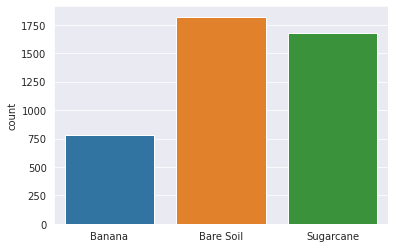

In [10]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('darkgrid')
sns.countplot(l)

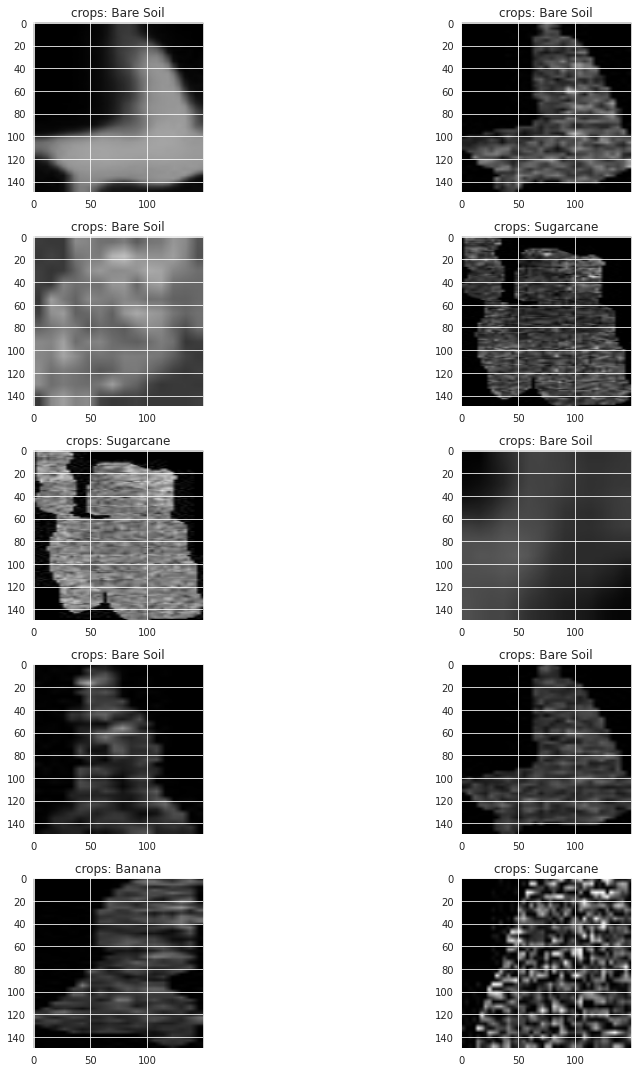

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('crops: '+labels[data[l][1]])
        
plt.tight_layout()

In [0]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [0]:
# Normalize the data
x = np.array(x) / 255

In [0]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [0]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [18]:
pre_trained_model = VGG16(input_shape=(150,150,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = False
    
model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(3 , activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 14,720,835
Trainable params: 6,147
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 64) , epochs = 25 , validation_data = (x_test, y_test))

Epoch 1/25
54/54 [==============================] - 923s 17s/step - loss: 0.8410 - accuracy: 0.6146 - val_loss: 0.7049 - val_accuracy: 0.6853
Epoch 2/25
54/54 [==============================] - 921s 17s/step - loss: 0.6363 - accuracy: 0.7528 - val_loss: 0.5805 - val_accuracy: 0.7716
Epoch 3/25
54/54 [==============================] - 920s 17s/step - loss: 0.5674 - accuracy: 0.7866 - val_loss: 0.5252 - val_accuracy: 0.7879
Epoch 4/25
54/54 [==============================] - 923s 17s/step - loss: 0.5205 - accuracy: 0.7962 - val_loss: 0.4846 - val_accuracy: 0.8182
Epoch 5/25
54/54 [==============================] - 922s 17s/step - loss: 0.4944 - accuracy: 0.8125 - val_loss: 0.4558 - val_accuracy: 0.8450
Epoch 6/25
54/54 [==============================] - 919s 17s/step - loss: 0.4661 - accuracy: 0.8280 - val_loss: 0.4424 - val_accuracy: 0.8252
Epoch 7/25
54/54 [==============================] - 920s 17s/step - loss: 0.4477 - accuracy: 0.8379 - val_loss: 0.4426 - val_accuracy: 0.8228
Epoch 

In [20]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0] , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

858/858 [==============================] - 183s 213ms/step
Loss of the model is -  0.28745084646698477 %
858/858 [==============================] - 183s 213ms/step
Accuracy of the model is -  89.51048851013184 %


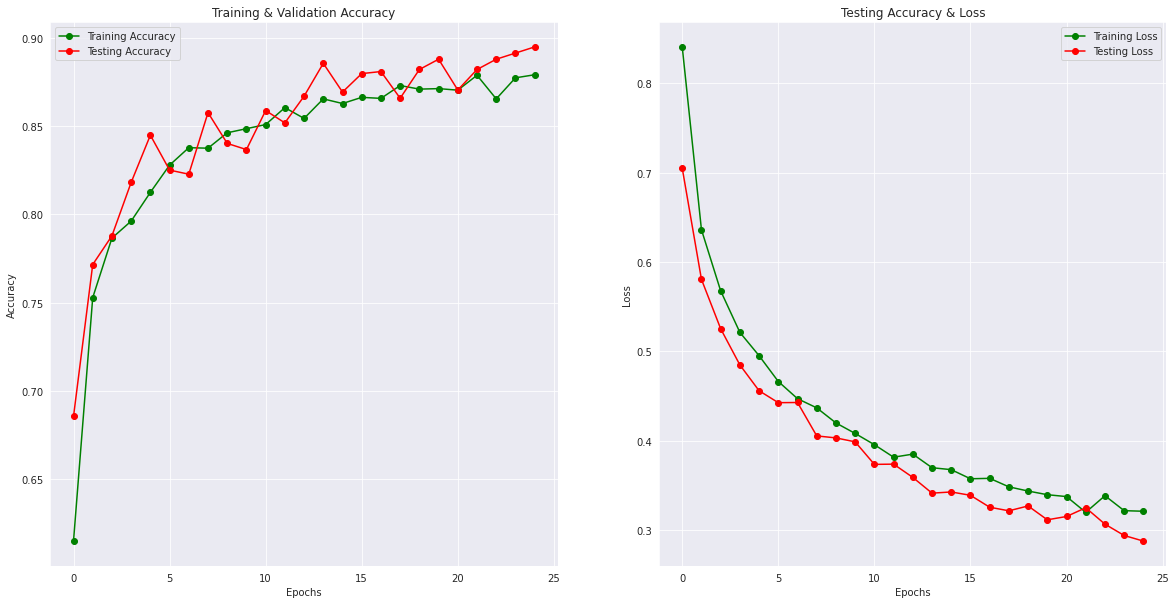

In [21]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [0]:
predictions = model.predict_classes(x_test)


In [0]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [29]:
print(classification_report(y_test_inv, predictions, target_names = labels))

              precision    recall  f1-score   support

      Banana       0.97      0.85      0.91       170
   Bare Soil       0.86      0.91      0.88       356
   Sugarcane       0.90      0.90      0.90       332

    accuracy                           0.90       858
   macro avg       0.91      0.89      0.90       858
weighted avg       0.90      0.90      0.90       858



In [30]:
cm = confusion_matrix(y_test_inv,predictions)
cm

array([[144,  21,   5],
       [  4, 325,  27],
       [  0,  33, 299]])

In [0]:
import pandas as pd


In [0]:
cm = pd.DataFrame(cm , index = labels , columns = labels)

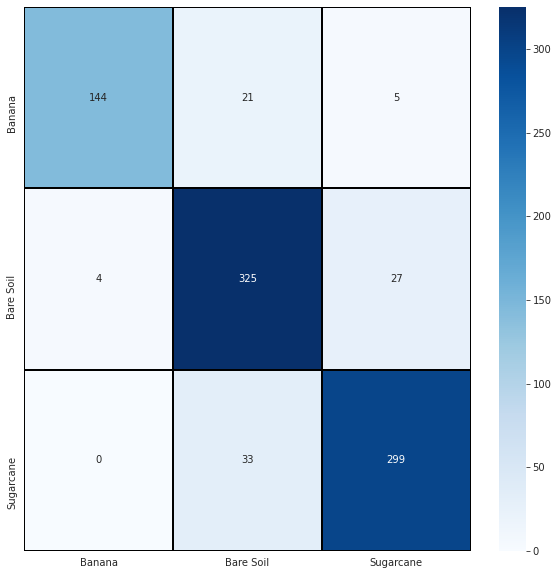

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

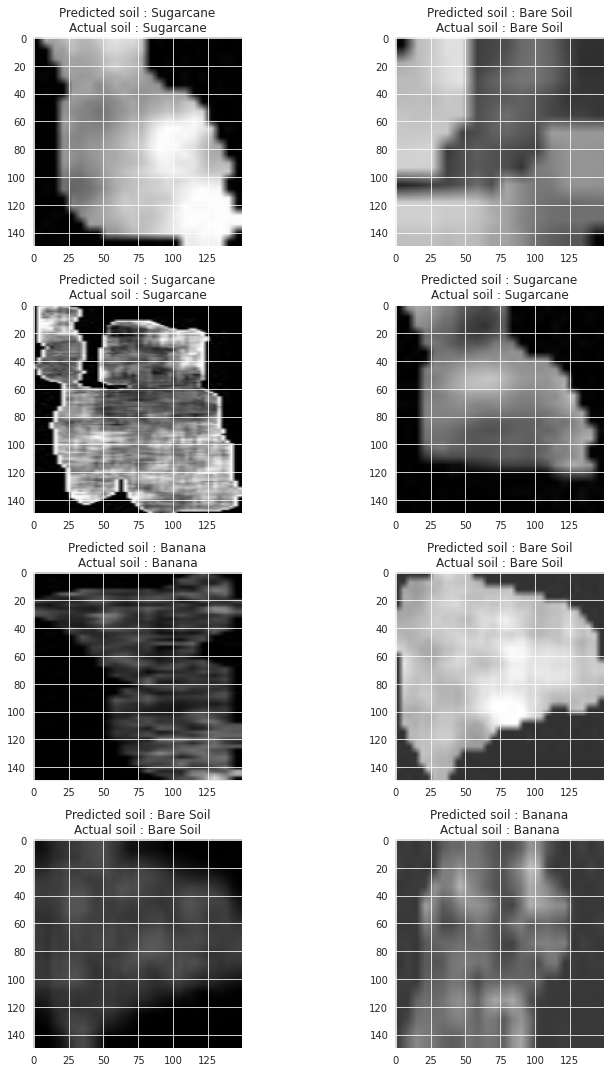

In [37]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted soil : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual soil : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1